## Import Libraries

In [1]:
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from tqdm import tqdm

tqdm.pandas()

## Import Datasets

In [44]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/1jkb4T4-5jzNCo-yWMnfbY0bcRg3K6nf00Ygk0w8Iu7I/export?gid=1424141895&format=csv')
df.head()

,judul,asal,person,sentence,label
0,Legenda Danau Toba,Sumatera Utara,ni,"Di sebuah desa di wilayah Sumatera, hidup seor...",1.0
1,Legenda Danau Toba,Sumatera Utara,ni,Ia seorang petani yang rajin bekerja walaupun ...,1.0
2,Legenda Danau Toba,Sumatera Utara,ni,"Sebenarnya usianya sudah cukup untuk menikah, ...",1.0
3,Legenda Danau Toba,Sumatera Utara,ni,"Di suatu pagi hari yang cerah, petani itu mema...",1.0
4,Legenda Danau Toba,Sumatera Utara,ni,â€œMudah-mudahan hari ini aku mendapat ikan ya...,2.0


## Utility Functions

In [45]:
def wordcloud(df, column):
  text = df[column].str.cat(sep=' ')
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
  
  plt.figure(figsize=(8, 4))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

## Preprocessing

### Case Folding

In [46]:
df['lower'] = df['sentence'].str.lower()
df.head()

,judul,asal,person,sentence,label,lower
0,Legenda Danau Toba,Sumatera Utara,ni,"Di sebuah desa di wilayah Sumatera, hidup seor...",1.0,"di sebuah desa di wilayah sumatera, hidup seor..."
1,Legenda Danau Toba,Sumatera Utara,ni,Ia seorang petani yang rajin bekerja walaupun ...,1.0,ia seorang petani yang rajin bekerja walaupun ...
2,Legenda Danau Toba,Sumatera Utara,ni,"Sebenarnya usianya sudah cukup untuk menikah, ...",1.0,"sebenarnya usianya sudah cukup untuk menikah, ..."
3,Legenda Danau Toba,Sumatera Utara,ni,"Di suatu pagi hari yang cerah, petani itu mema...",1.0,"di suatu pagi hari yang cerah, petani itu mema..."
4,Legenda Danau Toba,Sumatera Utara,ni,â€œMudah-mudahan hari ini aku mendapat ikan ya...,2.0,â€œmudah-mudahan hari ini aku mendapat ikan ya...


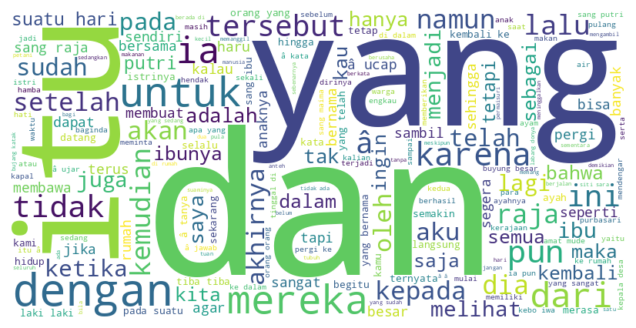

In [47]:
wordcloud(df, 'lower')

### Removing Punctuation and Special Characters

In [48]:
def get_alphanumeric(text: str):
  return re.sub('[^0-9a-zA-Z -]+', '', text)
  
df['alnum'] = df['lower'].apply(get_alphanumeric)
df.head()

,judul,asal,person,sentence,label,lower,alnum
0,Legenda Danau Toba,Sumatera Utara,ni,"Di sebuah desa di wilayah Sumatera, hidup seor...",1.0,"di sebuah desa di wilayah sumatera, hidup seor...",di sebuah desa di wilayah sumatera hidup seora...
1,Legenda Danau Toba,Sumatera Utara,ni,Ia seorang petani yang rajin bekerja walaupun ...,1.0,ia seorang petani yang rajin bekerja walaupun ...,ia seorang petani yang rajin bekerja walaupun ...
2,Legenda Danau Toba,Sumatera Utara,ni,"Sebenarnya usianya sudah cukup untuk menikah, ...",1.0,"sebenarnya usianya sudah cukup untuk menikah, ...",sebenarnya usianya sudah cukup untuk menikah t...
3,Legenda Danau Toba,Sumatera Utara,ni,"Di suatu pagi hari yang cerah, petani itu mema...",1.0,"di suatu pagi hari yang cerah, petani itu mema...",di suatu pagi hari yang cerah petani itu meman...
4,Legenda Danau Toba,Sumatera Utara,ni,â€œMudah-mudahan hari ini aku mendapat ikan ya...,2.0,â€œmudah-mudahan hari ini aku mendapat ikan ya...,mudah-mudahan hari ini aku mendapat ikan yang ...


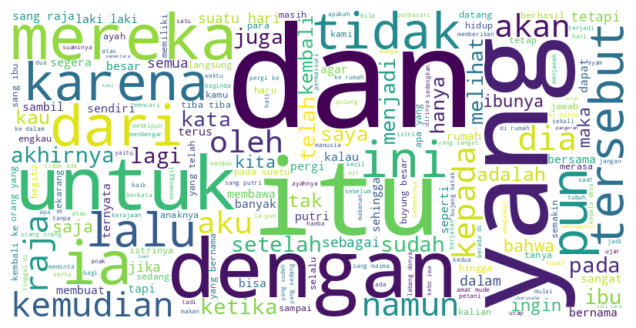

In [49]:
wordcloud(df, 'alnum')

### Removing Stopwords

In [50]:
stopwords_url = 'https://docs.google.com/spreadsheets/d/15oJvEfS_s6gUjltTC7UUP4EjOaBloxJyz6yqEKW68D0/export?format=csv&id=15oJvEfS_s6gUjltTC7UUP4EjOaBloxJyz6yqEKW68D0&gid=1594873845'
stopwords = pd.read_csv(stopwords_url)['stopword'].to_list()
stopwords[:10]

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir']

In [51]:
def remove_stopwords(text: str):
  return ' '.join([word for word in text.split() if word not in stopwords])

df['no_stopwords'] = df['alnum'].apply(remove_stopwords)
df.head()

,judul,asal,person,sentence,label,lower,alnum,no_stopwords
0,Legenda Danau Toba,Sumatera Utara,ni,"Di sebuah desa di wilayah Sumatera, hidup seor...",1.0,"di sebuah desa di wilayah sumatera, hidup seor...",di sebuah desa di wilayah sumatera hidup seora...,desa wilayah sumatera hidup petani
1,Legenda Danau Toba,Sumatera Utara,ni,Ia seorang petani yang rajin bekerja walaupun ...,1.0,ia seorang petani yang rajin bekerja walaupun ...,ia seorang petani yang rajin bekerja walaupun ...,petani rajin lahan pertaniannya luas
2,Legenda Danau Toba,Sumatera Utara,ni,"Sebenarnya usianya sudah cukup untuk menikah, ...",1.0,"sebenarnya usianya sudah cukup untuk menikah, ...",sebenarnya usianya sudah cukup untuk menikah t...,usianya menikah memilih hidup
3,Legenda Danau Toba,Sumatera Utara,ni,"Di suatu pagi hari yang cerah, petani itu mema...",1.0,"di suatu pagi hari yang cerah, petani itu mema...",di suatu pagi hari yang cerah petani itu meman...,pagi cerah petani memancing ikan disungai
4,Legenda Danau Toba,Sumatera Utara,ni,â€œMudah-mudahan hari ini aku mendapat ikan ya...,2.0,â€œmudah-mudahan hari ini aku mendapat ikan ya...,mudah-mudahan hari ini aku mendapat ikan yang ...,mudah-mudahan ikan gumam petani hati


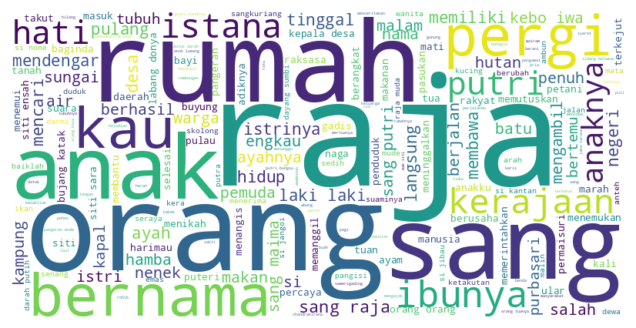

In [52]:
wordcloud(df, 'no_stopwords')

### Stemming

In [53]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text: str):
  return ' '.join([stemmer.stem(word) for word in text.split()])

df['stemmed'] = df['no_stopwords'].progress_apply(stem_text)
df.head()

100%|██████████| 9914/9914 [06:31<00:00, 25.32it/s]  


,judul,asal,person,sentence,label,lower,alnum,no_stopwords,stemmed
0,Legenda Danau Toba,Sumatera Utara,ni,"Di sebuah desa di wilayah Sumatera, hidup seor...",1.0,"di sebuah desa di wilayah sumatera, hidup seor...",di sebuah desa di wilayah sumatera hidup seora...,desa wilayah sumatera hidup petani,desa wilayah sumatera hidup tani
1,Legenda Danau Toba,Sumatera Utara,ni,Ia seorang petani yang rajin bekerja walaupun ...,1.0,ia seorang petani yang rajin bekerja walaupun ...,ia seorang petani yang rajin bekerja walaupun ...,petani rajin lahan pertaniannya luas,tani rajin lahan tani luas
2,Legenda Danau Toba,Sumatera Utara,ni,"Sebenarnya usianya sudah cukup untuk menikah, ...",1.0,"sebenarnya usianya sudah cukup untuk menikah, ...",sebenarnya usianya sudah cukup untuk menikah t...,usianya menikah memilih hidup,usia meni pilih hidup
3,Legenda Danau Toba,Sumatera Utara,ni,"Di suatu pagi hari yang cerah, petani itu mema...",1.0,"di suatu pagi hari yang cerah, petani itu mema...",di suatu pagi hari yang cerah petani itu meman...,pagi cerah petani memancing ikan disungai,pagi cerah tani pancing ikan sungai
4,Legenda Danau Toba,Sumatera Utara,ni,â€œMudah-mudahan hari ini aku mendapat ikan ya...,2.0,â€œmudah-mudahan hari ini aku mendapat ikan ya...,mudah-mudahan hari ini aku mendapat ikan yang ...,mudah-mudahan ikan gumam petani hati,mudah ikan gumam tani hati


In [54]:
df.to_csv('stemmed.csv', index=False)

### Remove Null Values

In [38]:
df = pd.read_csv('stemmed.csv')
df.dropna(subset=['stemmed'], inplace=True)
df.isnull().sum()

judul              0
asal               0
person             0
sentence           0
label           9408
lower              0
alnum              0
no_stopwords       0
stemmed            0
dtype: int64

In [39]:
df.to_csv('stemmed.csv', index=False)

## Training 1

In [175]:
df = pd.read_csv('stemmed.csv')
df.head()

,judul,asal,person,sentence,label,lower,alnum,no_stopwords,stemmed
0,Legenda Danau Toba,Sumatera Utara,ni,"Di sebuah desa di wilayah Sumatera, hidup seor...",1.0,"di sebuah desa di wilayah sumatera, hidup seor...",di sebuah desa di wilayah sumatera hidup seora...,desa wilayah sumatera hidup petani,desa wilayah sumatera hidup tani
1,Legenda Danau Toba,Sumatera Utara,ni,Ia seorang petani yang rajin bekerja walaupun ...,1.0,ia seorang petani yang rajin bekerja walaupun ...,ia seorang petani yang rajin bekerja walaupun ...,petani rajin lahan pertaniannya luas,tani rajin lahan tani luas
2,Legenda Danau Toba,Sumatera Utara,ni,"Sebenarnya usianya sudah cukup untuk menikah, ...",1.0,"sebenarnya usianya sudah cukup untuk menikah, ...",sebenarnya usianya sudah cukup untuk menikah t...,usianya menikah memilih hidup,usia meni pilih hidup
3,Legenda Danau Toba,Sumatera Utara,ni,"Di suatu pagi hari yang cerah, petani itu mema...",1.0,"di suatu pagi hari yang cerah, petani itu mema...",di suatu pagi hari yang cerah petani itu meman...,pagi cerah petani memancing ikan disungai,pagi cerah tani pancing ikan sungai
4,Legenda Danau Toba,Sumatera Utara,ni,â€œMudah-mudahan hari ini aku mendapat ikan ya...,2.0,â€œmudah-mudahan hari ini aku mendapat ikan ya...,mudah-mudahan hari ini aku mendapat ikan yang ...,mudah-mudahan ikan gumam petani hati,mudah ikan gumam tani hati


### Split Data

In [176]:
from sklearn.model_selection import train_test_split

texts = df['stemmed'].iloc[:500].to_list()
labels = df['label'].iloc[:500].apply(lambda x: int(x)).to_list()

X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

### Vectorization

In [177]:
from gensim.models import Word2Vec

tokenized = [text.split() for text in texts]

model_wv = Word2Vec(tokenized, vector_size=100, window=5, min_count=1, workers=4)
model_wv.train(tokenized, total_examples=model_wv.corpus_count, epochs=10)

model_wv.save('word2vec.model')

### Convert to Sequence

In [178]:
from keras.preprocessing.sequence import pad_sequences

model_wv = Word2Vec.load('word2vec.model')

def text_to_sequence(text: str, model: Word2Vec, max_length: int):
  words = text.split()
  sequence = [model.wv[word] for word in words if word in model.wv]
  sequence_pad = pad_sequences([sequence], maxlen=max_length, dtype='float', padding='post', truncating='post')

  if len(sequence) == 0:
    return np.zeros((max_length, max_length))

  return sequence_pad[0]

max_length = 100
X_train_seq = np.array([text_to_sequence(text, model_wv, max_length) for text in X_train])
X_test_seq = np.array([text_to_sequence(text, model_wv, max_length) for text in X_test])

### Encode Labels

In [179]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

### Build Model

In [180]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Masking

model = Sequential()
model.add(Masking(mask_value=0., input_shape=(max_length, 100)))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train_seq, np.array(y_train), epochs=20, batch_size=32, validation_split=0.2)

400
Epoch 1/20
10/10 [==============================] - 3s 118ms/step - loss: 1.0717 - accuracy: 0.4313 - val_loss: 0.9227 - val_accuracy: 0.7125
Epoch 2/20
10/10 [==============================] - 1s 84ms/step - loss: 1.0120 - accuracy: 0.5500 - val_loss: 0.8522 - val_accuracy: 0.7125
Epoch 3/20
10/10 [==============================] - 1s 75ms/step - loss: 1.0006 - accuracy: 0.5500 - val_loss: 0.8692 - val_accuracy: 0.7125
Epoch 4/20
10/10 [==============================] - 1s 73ms/step - loss: 0.9894 - accuracy: 0.5469 - val_loss: 0.8547 - val_accuracy: 0.7125
Epoch 5/20
10/10 [==============================] - 1s 69ms/step - loss: 0.9883 - accuracy: 0.5531 - val_loss: 0.8388 - val_accuracy: 0.7000
Epoch 6/20
10/10 [==============================] - 1s 68ms/step - loss: 0.9903 - accuracy: 0.5437 - val_loss: 0.8230 - val_accuracy: 0.7125
Epoch 7/20
10/10 [==============================] - 1s 63ms/step - loss: 0.9859 - accuracy: 0.5406 - val_loss: 0.8431 - val_accuracy: 0.6875
Epoch 8/

### Evaluate Model

In [181]:
loss, accuracy = model.evaluate(X_test_seq, np.array(y_test))
print(f'Loss: {loss}, Accuracy: {accuracy}')

predictions = model.predict(X_test_seq)
pred_class = np.argmax(predictions, axis=1)

predictions

4/4 [==============================] - 0s 16ms/step - loss: 0.8890 - accuracy: 0.6800
Loss: 0.8889543414115906, Accuracy: 0.6800000071525574
4/4 [==============================] - 0s 16ms/step


array([[0.1382726 , 0.58435   , 0.2773774 ],
       [0.16247176, 0.58707875, 0.25044948],
       [0.24691845, 0.44899207, 0.30408943],
       [0.07908452, 0.6705594 , 0.25035605],
       [0.11063953, 0.61157584, 0.27778465],
       [0.20301077, 0.51191705, 0.28507215],
       [0.18164612, 0.6181299 , 0.20022397],
       [0.15561694, 0.56518596, 0.27919704],
       [0.10898614, 0.61118853, 0.27982536],
       [0.09116118, 0.65942496, 0.24941394],
       [0.23359892, 0.459297  , 0.3071041 ],
       [0.21871522, 0.47155258, 0.3097322 ],
       [0.22890599, 0.513398  , 0.25769603],
       [0.10760679, 0.61489254, 0.27750072],
       [0.2956146 , 0.46342418, 0.2409612 ],
       [0.256426  , 0.5051608 , 0.23841321],
       [0.11098068, 0.6286167 , 0.2604026 ],
       [0.15675884, 0.5684201 , 0.27482104],
       [0.12238519, 0.5963435 , 0.2812713 ],
       [0.14185834, 0.6168799 , 0.2412618 ],
       [0.13469848, 0.5774496 , 0.28785187],
       [0.17214096, 0.5342448 , 0.2936142 ],
       [0.

### Save Model

In [182]:
model.save('model-1.keras')

## Pseudo Labeling 1

### Prepare Dataset

In [201]:
df = pd.read_csv('stemmed.csv')
df_rest = df.iloc[500:].copy()
df_rest.head()

,judul,asal,person,sentence,label,lower,alnum,no_stopwords,stemmed
500,Partiga Tiga Sipunjung Dan Anggaranim,Sumatera Utara,Nan Sorma,Tuan yang kosong itu dibawanya kembali seolah-...,NaN,tuan yang kosong itu dibawanya kembali seolah-...,tuan yang kosong itu dibawanya kembali seolah-...,tuan kosong dibawanya seolah-oleh sesungguhnya...,tuan kosong bawa seolah-oleh sungguh nan sorma
501,Partiga Tiga Sipunjung Dan Anggaranim,Sumatera Utara,Si,Sejak peristiwa ini raja-raja Siantar mengangg...,NaN,sejak peristiwa ini raja-raja siantar mengangg...,sejak peristiwa ini raja-raja siantar mengangg...,peristiwa raja-raja siantar menganggap suci,peristiwa raja siantar anggap suci
502,Partiga Tiga Sipunjung Dan Anggaranim,Sumatera Utara,Nan Sorma,"Mereka menamakannya ""Sombaon Nan Sorma",NaN,"mereka menamakannya ""sombaon nan sorma",mereka menamakannya sombaon nan sorma,menamakannya sombaon nan sorma,nama sombaon nan sorma
503,Partiga Tiga Sipunjung Dan Anggaranim,Sumatera Utara,Partigatiga Sipunjung,"Keluarga raja-raja Siantar, Bandar, Damanik da...",NaN,"keluarga raja-raja siantar, bandar, damanik da...",keluarga raja-raja siantar bandar damanik dan ...,keluarga raja-raja siantar bandar damanik bah ...,keluarga raja siantar bandar damanik bah bolak...
504,Partiga Tiga Sipunjung Dan Anggaranim,Sumatera Utara,nik Bariba,"Mereka memakai nama marga ""Damanik Bariba",NaN,"mereka memakai nama marga ""damanik bariba",mereka memakai nama marga damanik bariba,memakai nama marga damanik bariba,pakai nama marga damanik bariba


In [202]:
X_rest = df_rest['stemmed'].to_list()
X_rest_seq = np.array([text_to_sequence(text, model_wv, max_length) for text in X_rest])
print(X_rest_seq.shape)

(9408, 100, 100)


### Predict Labels

In [203]:
from keras.models import load_model

model = load_model('model-1.keras')
pred_rest = model.predict(X_rest_seq)

294/294 [==============================] - 7s 24ms/step


In [204]:
confidence_threshold = 0.6

pred_class_rest = np.argmax(pred_rest, axis=1)
pred_confidence = np.max(pred_rest, axis=1)

df_rest.loc[pred_confidence >= confidence_threshold, 'label'] = pred_class_rest[pred_confidence >= confidence_threshold]

df_rest.head()

,judul,asal,person,sentence,label,lower,alnum,no_stopwords,stemmed
500,Partiga Tiga Sipunjung Dan Anggaranim,Sumatera Utara,Nan Sorma,Tuan yang kosong itu dibawanya kembali seolah-...,NaN,tuan yang kosong itu dibawanya kembali seolah-...,tuan yang kosong itu dibawanya kembali seolah-...,tuan kosong dibawanya seolah-oleh sesungguhnya...,tuan kosong bawa seolah-oleh sungguh nan sorma
501,Partiga Tiga Sipunjung Dan Anggaranim,Sumatera Utara,Si,Sejak peristiwa ini raja-raja Siantar mengangg...,NaN,sejak peristiwa ini raja-raja siantar mengangg...,sejak peristiwa ini raja-raja siantar mengangg...,peristiwa raja-raja siantar menganggap suci,peristiwa raja siantar anggap suci
502,Partiga Tiga Sipunjung Dan Anggaranim,Sumatera Utara,Nan Sorma,"Mereka menamakannya ""Sombaon Nan Sorma",NaN,"mereka menamakannya ""sombaon nan sorma",mereka menamakannya sombaon nan sorma,menamakannya sombaon nan sorma,nama sombaon nan sorma
503,Partiga Tiga Sipunjung Dan Anggaranim,Sumatera Utara,Partigatiga Sipunjung,"Keluarga raja-raja Siantar, Bandar, Damanik da...",NaN,"keluarga raja-raja siantar, bandar, damanik da...",keluarga raja-raja siantar bandar damanik dan ...,keluarga raja-raja siantar bandar damanik bah ...,keluarga raja siantar bandar damanik bah bolak...
504,Partiga Tiga Sipunjung Dan Anggaranim,Sumatera Utara,nik Bariba,"Mereka memakai nama marga ""Damanik Bariba",NaN,"mereka memakai nama marga ""damanik bariba",mereka memakai nama marga damanik bariba,memakai nama marga damanik bariba,pakai nama marga damanik bariba


### Merge Datasets

In [205]:
df = pd.concat([df.iloc[:500], df_rest], ignore_index=True)
df.head()

,judul,asal,person,sentence,label,lower,alnum,no_stopwords,stemmed
0,Legenda Danau Toba,Sumatera Utara,ni,"Di sebuah desa di wilayah Sumatera, hidup seor...",1.0,"di sebuah desa di wilayah sumatera, hidup seor...",di sebuah desa di wilayah sumatera hidup seora...,desa wilayah sumatera hidup petani,desa wilayah sumatera hidup tani
1,Legenda Danau Toba,Sumatera Utara,ni,Ia seorang petani yang rajin bekerja walaupun ...,1.0,ia seorang petani yang rajin bekerja walaupun ...,ia seorang petani yang rajin bekerja walaupun ...,petani rajin lahan pertaniannya luas,tani rajin lahan tani luas
2,Legenda Danau Toba,Sumatera Utara,ni,"Sebenarnya usianya sudah cukup untuk menikah, ...",1.0,"sebenarnya usianya sudah cukup untuk menikah, ...",sebenarnya usianya sudah cukup untuk menikah t...,usianya menikah memilih hidup,usia meni pilih hidup
3,Legenda Danau Toba,Sumatera Utara,ni,"Di suatu pagi hari yang cerah, petani itu mema...",1.0,"di suatu pagi hari yang cerah, petani itu mema...",di suatu pagi hari yang cerah petani itu meman...,pagi cerah petani memancing ikan disungai,pagi cerah tani pancing ikan sungai
4,Legenda Danau Toba,Sumatera Utara,ni,â€œMudah-mudahan hari ini aku mendapat ikan ya...,2.0,â€œmudah-mudahan hari ini aku mendapat ikan ya...,mudah-mudahan hari ini aku mendapat ikan yang ...,mudah-mudahan ikan gumam petani hati,mudah ikan gumam tani hati


In [206]:
df.sort_values('label', ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,judul,asal,person,sentence,label,lower,alnum,no_stopwords,stemmed
0,Si Buyung Besar,Sumatera Utara,Buyung Besar,"""Malang tak dapat ditolak, untung tak dapat di...",2.0,"""malang tak dapat ditolak, untung tak dapat di...",malang tak dapat ditolak untung tak dapat dira...,malang ditolak untung diraih takdir baginya ak...,malang tolak untung raih takdir bagi akad nika...
1,Si Buyung Besar,Sumatera Utara,Buyung Besar,Mereka mengharapkan Buyung Besar kembali memba...,2.0,mereka mengharapkan buyung besar kembali memba...,mereka mengharapkan buyung besar kembali memba...,mengharapkan buyung membawa dagangan terima ka...,harap buyung bawa dagang terima kasih baik hati
2,Si Buyung Besar,Sumatera Utara,si Buyung Besar,Penduduk kampung itu tak lupa mengucapkan teri...,2.0,penduduk kampung itu tak lupa mengucapkan teri...,penduduk kampung itu tak lupa mengucapkan teri...,penduduk kampung lupa terima kasih si buyung k...,duduk kampung lupa terima kasih si buyung baik...
3,Jibau Malang,Sumatera Utara,Orang Kaya Muda,Terdengarlah khabar oleh DAtuk Orang Kaya Muda...,2.0,terdengarlah khabar oleh datuk orang kaya muda...,terdengarlah khabar oleh datuk orang kaya muda...,terdengarlah khabar datuk orang kaya muda jiba...,dengar khabar datuk orang kaya muda jibau hidu...
4,Si Buyung Besar,Sumatera Utara,Buyung Besar,Buyung Besar menjelaskan kabar baik serta memb...,2.0,buyung besar menjelaskan kabar baik serta memb...,buyung besar menjelaskan kabar baik serta memb...,buyung kabar memberitahu hasil dagangannya pul...,buyung kabar memberitahu hasil dagang pulang p...


In [210]:
df.count()

judul           9908
asal            9908
person          9908
sentence        9908
label           1761
lower           9908
alnum           9908
no_stopwords    9908
stemmed         9908
dtype: int64

In [211]:
df.to_csv('labeled-1.csv', index=False)

## Training 2

In [212]:
df = pd.read_csv('labeled-1.csv')
df.head()

,judul,asal,person,sentence,label,lower,alnum,no_stopwords,stemmed
0,Si Buyung Besar,Sumatera Utara,Buyung Besar,"""Malang tak dapat ditolak, untung tak dapat di...",2.0,"""malang tak dapat ditolak, untung tak dapat di...",malang tak dapat ditolak untung tak dapat dira...,malang ditolak untung diraih takdir baginya ak...,malang tolak untung raih takdir bagi akad nika...
1,Si Buyung Besar,Sumatera Utara,Buyung Besar,Mereka mengharapkan Buyung Besar kembali memba...,2.0,mereka mengharapkan buyung besar kembali memba...,mereka mengharapkan buyung besar kembali memba...,mengharapkan buyung membawa dagangan terima ka...,harap buyung bawa dagang terima kasih baik hati
2,Si Buyung Besar,Sumatera Utara,si Buyung Besar,Penduduk kampung itu tak lupa mengucapkan teri...,2.0,penduduk kampung itu tak lupa mengucapkan teri...,penduduk kampung itu tak lupa mengucapkan teri...,penduduk kampung lupa terima kasih si buyung k...,duduk kampung lupa terima kasih si buyung baik...
3,Jibau Malang,Sumatera Utara,Orang Kaya Muda,Terdengarlah khabar oleh DAtuk Orang Kaya Muda...,2.0,terdengarlah khabar oleh datuk orang kaya muda...,terdengarlah khabar oleh datuk orang kaya muda...,terdengarlah khabar datuk orang kaya muda jiba...,dengar khabar datuk orang kaya muda jibau hidu...
4,Si Buyung Besar,Sumatera Utara,Buyung Besar,Buyung Besar menjelaskan kabar baik serta memb...,2.0,buyung besar menjelaskan kabar baik serta memb...,buyung besar menjelaskan kabar baik serta memb...,buyung kabar memberitahu hasil dagangannya pul...,buyung kabar memberitahu hasil dagang pulang p...


In [213]:
df.count()

judul           9908
asal            9908
person          9908
sentence        9908
label           1761
lower           9908
alnum           9908
no_stopwords    9908
stemmed         9908
dtype: int64

### Split Data

In [214]:
from sklearn.model_selection import train_test_split

texts = df['stemmed'].iloc[:1761].to_list()
labels = df['label'].iloc[:1761].apply(lambda x: int(x)).to_list()

X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

### Encode Labels

In [215]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

### Build Model

In [216]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Masking

X_train_seq = np.array([text_to_sequence(text, model_wv, max_length) for text in X_train])
X_test_seq = np.array([text_to_sequence(text, model_wv, max_length) for text in X_test])

model = Sequential()
model.add(Masking(mask_value=0., input_shape=(max_length, 100)))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train_seq, np.array(y_train), epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
36/36 [==============================] - 6s 91ms/step - loss: 0.5540 - accuracy: 0.8570 - val_loss: 0.3472 - val_accuracy: 0.9149
Epoch 2/20
36/36 [==============================] - 3s 82ms/step - loss: 0.3899 - accuracy: 0.8774 - val_loss: 0.3445 - val_accuracy: 0.9149
Epoch 3/20
36/36 [==============================] - 4s 100ms/step - loss: 0.3828 - accuracy: 0.8766 - val_loss: 0.3400 - val_accuracy: 0.9113
Epoch 4/20
36/36 [==============================] - 4s 104ms/step - loss: 0.3807 - accuracy: 0.8819 - val_loss: 0.3442 - val_accuracy: 0.9184
Epoch 5/20
36/36 [==============================] - 4s 106ms/step - loss: 0.3746 - accuracy: 0.8810 - val_loss: 0.3470 - val_accuracy: 0.9149
Epoch 6/20
36/36 [==============================] - 4s 103ms/step - loss: 0.3795 - accuracy: 0.8828 - val_loss: 0.3485 - val_accuracy: 0.9078
Epoch 7/20
36/36 [==============================] - 4s 104ms/step - loss: 0.3745 - accuracy: 0.8819 - val_loss: 0.3440 - val_accuracy: 0.9184
Epoch 8/

### Evaluate Model

In [217]:
loss, accuracy = model.evaluate(X_test_seq, np.array(y_test))
print(f'Loss: {loss}, Accuracy: {accuracy}')

predictions = model.predict(X_test_seq)
pred_class = np.argmax(predictions, axis=1)

predictions

12/12 [==============================] - 0s 19ms/step - loss: 0.3630 - accuracy: 0.8782
Loss: 0.3629673719406128, Accuracy: 0.8781869411468506
12/12 [==============================] - 0s 19ms/step


array([[0.21775693, 0.53800917, 0.24423392],
       [0.03314213, 0.8583082 , 0.10854964],
       [0.02359901, 0.8995684 , 0.0768326 ],
       ...,
       [0.00692719, 0.94361603, 0.04945675],
       [0.00765453, 0.9522107 , 0.04013476],
       [0.01875779, 0.9162678 , 0.06497437]], dtype=float32)

### Save Model

In [218]:
model.save('model-2.keras')

## Pseudo Labeling 2

### Prepare Dataset

In [234]:
df = pd.read_csv('labeled-1.csv')
df_rest = df.iloc[1761:].copy()
df_rest.head()

,judul,asal,person,sentence,label,lower,alnum,no_stopwords,stemmed
1761,Partiga Tiga Sipunjung Dan Anggaranim,Sumatera Utara,Nan Sorma,Tuan yang kosong itu dibawanya kembali seolah-...,NaN,tuan yang kosong itu dibawanya kembali seolah-...,tuan yang kosong itu dibawanya kembali seolah-...,tuan kosong dibawanya seolah-oleh sesungguhnya...,tuan kosong bawa seolah-oleh sungguh nan sorma
1762,Partiga Tiga Sipunjung Dan Anggaranim,Sumatera Utara,Si,Sejak peristiwa ini raja-raja Siantar mengangg...,NaN,sejak peristiwa ini raja-raja siantar mengangg...,sejak peristiwa ini raja-raja siantar mengangg...,peristiwa raja-raja siantar menganggap suci,peristiwa raja siantar anggap suci
1763,Partiga Tiga Sipunjung Dan Anggaranim,Sumatera Utara,Nan Sorma,"Mereka menamakannya ""Sombaon Nan Sorma",NaN,"mereka menamakannya ""sombaon nan sorma",mereka menamakannya sombaon nan sorma,menamakannya sombaon nan sorma,nama sombaon nan sorma
1764,Partiga Tiga Sipunjung Dan Anggaranim,Sumatera Utara,Partigatiga Sipunjung,"Keluarga raja-raja Siantar, Bandar, Damanik da...",NaN,"keluarga raja-raja siantar, bandar, damanik da...",keluarga raja-raja siantar bandar damanik dan ...,keluarga raja-raja siantar bandar damanik bah ...,keluarga raja siantar bandar damanik bah bolak...
1765,Partiga Tiga Sipunjung Dan Anggaranim,Sumatera Utara,nik Bariba,"Mereka memakai nama marga ""Damanik Bariba",NaN,"mereka memakai nama marga ""damanik bariba",mereka memakai nama marga damanik bariba,memakai nama marga damanik bariba,pakai nama marga damanik bariba


In [235]:
X_rest = df_rest['stemmed'].to_list()
X_rest_seq = np.array([text_to_sequence(text, model_wv, max_length) for text in X_rest])
print(X_rest_seq.shape)

(8147, 100, 100)


### Predict Labels

In [236]:
from keras.models import load_model

model = load_model('model-2.keras')
pred_rest = model.predict(X_rest_seq)

255/255 [==============================] - 5s 18ms/step


In [237]:
confidence_threshold = 0.6

pred_class_rest = np.argmax(pred_rest, axis=1)
pred_confidence = np.max(pred_rest, axis=1)

df_rest.loc[pred_confidence >= confidence_threshold, 'label'] = pred_class_rest[pred_confidence >= confidence_threshold]

df_rest.head()

,judul,asal,person,sentence,label,lower,alnum,no_stopwords,stemmed
1761,Partiga Tiga Sipunjung Dan Anggaranim,Sumatera Utara,Nan Sorma,Tuan yang kosong itu dibawanya kembali seolah-...,1.0,tuan yang kosong itu dibawanya kembali seolah-...,tuan yang kosong itu dibawanya kembali seolah-...,tuan kosong dibawanya seolah-oleh sesungguhnya...,tuan kosong bawa seolah-oleh sungguh nan sorma
1762,Partiga Tiga Sipunjung Dan Anggaranim,Sumatera Utara,Si,Sejak peristiwa ini raja-raja Siantar mengangg...,1.0,sejak peristiwa ini raja-raja siantar mengangg...,sejak peristiwa ini raja-raja siantar mengangg...,peristiwa raja-raja siantar menganggap suci,peristiwa raja siantar anggap suci
1763,Partiga Tiga Sipunjung Dan Anggaranim,Sumatera Utara,Nan Sorma,"Mereka menamakannya ""Sombaon Nan Sorma",1.0,"mereka menamakannya ""sombaon nan sorma",mereka menamakannya sombaon nan sorma,menamakannya sombaon nan sorma,nama sombaon nan sorma
1764,Partiga Tiga Sipunjung Dan Anggaranim,Sumatera Utara,Partigatiga Sipunjung,"Keluarga raja-raja Siantar, Bandar, Damanik da...",1.0,"keluarga raja-raja siantar, bandar, damanik da...",keluarga raja-raja siantar bandar damanik dan ...,keluarga raja-raja siantar bandar damanik bah ...,keluarga raja siantar bandar damanik bah bolak...
1765,Partiga Tiga Sipunjung Dan Anggaranim,Sumatera Utara,nik Bariba,"Mereka memakai nama marga ""Damanik Bariba",1.0,"mereka memakai nama marga ""damanik bariba",mereka memakai nama marga damanik bariba,memakai nama marga damanik bariba,pakai nama marga damanik bariba


### Merge Datasets

In [238]:
df = pd.concat([df.iloc[:1761], df_rest], ignore_index=True)
df.head()

,judul,asal,person,sentence,label,lower,alnum,no_stopwords,stemmed
0,Si Buyung Besar,Sumatera Utara,Buyung Besar,"""Malang tak dapat ditolak, untung tak dapat di...",2.0,"""malang tak dapat ditolak, untung tak dapat di...",malang tak dapat ditolak untung tak dapat dira...,malang ditolak untung diraih takdir baginya ak...,malang tolak untung raih takdir bagi akad nika...
1,Si Buyung Besar,Sumatera Utara,Buyung Besar,Mereka mengharapkan Buyung Besar kembali memba...,2.0,mereka mengharapkan buyung besar kembali memba...,mereka mengharapkan buyung besar kembali memba...,mengharapkan buyung membawa dagangan terima ka...,harap buyung bawa dagang terima kasih baik hati
2,Si Buyung Besar,Sumatera Utara,si Buyung Besar,Penduduk kampung itu tak lupa mengucapkan teri...,2.0,penduduk kampung itu tak lupa mengucapkan teri...,penduduk kampung itu tak lupa mengucapkan teri...,penduduk kampung lupa terima kasih si buyung k...,duduk kampung lupa terima kasih si buyung baik...
3,Jibau Malang,Sumatera Utara,Orang Kaya Muda,Terdengarlah khabar oleh DAtuk Orang Kaya Muda...,2.0,terdengarlah khabar oleh datuk orang kaya muda...,terdengarlah khabar oleh datuk orang kaya muda...,terdengarlah khabar datuk orang kaya muda jiba...,dengar khabar datuk orang kaya muda jibau hidu...
4,Si Buyung Besar,Sumatera Utara,Buyung Besar,Buyung Besar menjelaskan kabar baik serta memb...,2.0,buyung besar menjelaskan kabar baik serta memb...,buyung besar menjelaskan kabar baik serta memb...,buyung kabar memberitahu hasil dagangannya pul...,buyung kabar memberitahu hasil dagang pulang p...


In [239]:
df.sort_values('label', ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,judul,asal,person,sentence,label,lower,alnum,no_stopwords,stemmed
0,Si Buyung Besar,Sumatera Utara,Buyung Besar,"""Malang tak dapat ditolak, untung tak dapat di...",2.0,"""malang tak dapat ditolak, untung tak dapat di...",malang tak dapat ditolak untung tak dapat dira...,malang ditolak untung diraih takdir baginya ak...,malang tolak untung raih takdir bagi akad nika...
1,Jibau Malang,Sumatera Utara,Selamat Panjang Gombak,""" Selamat Panjang Gombak pun pergilah menyambu...",2.0,""" selamat panjang gombak pun pergilah menyambu...",selamat panjang gombak pun pergilah menyambut...,selamat gombak pergilah menyambut si jibau,selamat gombak pergi sambut si jibau
2,Legenda Danau Toba,Sumatera Utara,Petani,Petani merasa sangat bahagia dan tenteram,2.0,petani merasa sangat bahagia dan tenteram,petani merasa sangat bahagia dan tenteram,petani bahagia tenteram,tani bahagia tenteram
3,Si Buyung Besar,Sumatera Utara,si Buyung Besar,"sebelum berangkat, malamnya si Buyung Besar le...",2.0,"sebelum berangkat, malamnya si buyung besar le...",sebelum berangkat malamnya si buyung besar leb...,berangkat malamnya si buyung pamit ayah-bundan...,berangkat malam si buyung pamit ayah-bundanya ...
4,Sampuraga Si Anak Durhaka,Sumatera Utara,Sampuraga,"Suatu hari, di bawah pohon rindang Sampuraga d...",2.0,"suatu hari, di bawah pohon rindang sampuraga d...",suatu hari di bawah pohon rindang sampuraga da...,pohon rindang sampuraga majikannya beristiraha...,pohon rindang sampuraga majikan istirahat semb...


In [240]:
df.count()

judul           9908
asal            9908
person          9908
sentence        9908
label           6424
lower           9908
alnum           9908
no_stopwords    9908
stemmed         9908
dtype: int64

In [241]:
df.to_csv('labeled-2.csv', index=False)

## Training 3

In [242]:
df = pd.read_csv('labeled-2.csv')
df.head()

,judul,asal,person,sentence,label,lower,alnum,no_stopwords,stemmed
0,Si Buyung Besar,Sumatera Utara,Buyung Besar,"""Malang tak dapat ditolak, untung tak dapat di...",2.0,"""malang tak dapat ditolak, untung tak dapat di...",malang tak dapat ditolak untung tak dapat dira...,malang ditolak untung diraih takdir baginya ak...,malang tolak untung raih takdir bagi akad nika...
1,Jibau Malang,Sumatera Utara,Selamat Panjang Gombak,""" Selamat Panjang Gombak pun pergilah menyambu...",2.0,""" selamat panjang gombak pun pergilah menyambu...",selamat panjang gombak pun pergilah menyambut...,selamat gombak pergilah menyambut si jibau,selamat gombak pergi sambut si jibau
2,Legenda Danau Toba,Sumatera Utara,Petani,Petani merasa sangat bahagia dan tenteram,2.0,petani merasa sangat bahagia dan tenteram,petani merasa sangat bahagia dan tenteram,petani bahagia tenteram,tani bahagia tenteram
3,Si Buyung Besar,Sumatera Utara,si Buyung Besar,"sebelum berangkat, malamnya si Buyung Besar le...",2.0,"sebelum berangkat, malamnya si buyung besar le...",sebelum berangkat malamnya si buyung besar leb...,berangkat malamnya si buyung pamit ayah-bundan...,berangkat malam si buyung pamit ayah-bundanya ...
4,Sampuraga Si Anak Durhaka,Sumatera Utara,Sampuraga,"Suatu hari, di bawah pohon rindang Sampuraga d...",2.0,"suatu hari, di bawah pohon rindang sampuraga d...",suatu hari di bawah pohon rindang sampuraga da...,pohon rindang sampuraga majikannya beristiraha...,pohon rindang sampuraga majikan istirahat semb...


In [243]:
df.count()

judul           9908
asal            9908
person          9908
sentence        9908
label           6424
lower           9908
alnum           9908
no_stopwords    9908
stemmed         9908
dtype: int64

### Split Data

In [244]:
from sklearn.model_selection import train_test_split

texts = df['stemmed'].iloc[:6424].to_list()
labels = df['label'].iloc[:6424].apply(lambda x: int(x)).to_list()

X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

### Encode Labels

In [245]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

### Build Model

In [247]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Masking

X_train_seq = np.array([text_to_sequence(text, model_wv, max_length) for text in X_train])
X_test_seq = np.array([text_to_sequence(text, model_wv, max_length) for text in X_test])

model = Sequential()
model.add(Masking(mask_value=0., input_shape=(max_length, 100)))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train_seq, np.array(y_train), epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
129/129 [==============================] - 19s 121ms/step - loss: 0.2496 - accuracy: 0.9613 - val_loss: 0.1368 - val_accuracy: 0.9728
Epoch 2/10
129/129 [==============================] - 15s 114ms/step - loss: 0.1379 - accuracy: 0.9706 - val_loss: 0.1310 - val_accuracy: 0.9737
Epoch 3/10
129/129 [==============================] - 15s 115ms/step - loss: 0.1332 - accuracy: 0.9696 - val_loss: 0.1276 - val_accuracy: 0.9737
Epoch 4/10
129/129 [==============================] - 15s 117ms/step - loss: 0.1312 - accuracy: 0.9698 - val_loss: 0.1283 - val_accuracy: 0.9747
Epoch 5/10
129/129 [==============================] - 15s 116ms/step - loss: 0.1318 - accuracy: 0.9701 - val_loss: 0.1236 - val_accuracy: 0.9737
Epoch 6/10
129/129 [==============================] - 15s 116ms/step - loss: 0.1305 - accuracy: 0.9698 - val_loss: 0.1236 - val_accuracy: 0.9737
Epoch 7/10
129/129 [==============================] - 16s 122ms/step - loss: 0.1284 - accuracy: 0.9703 - val_loss: 0.1267 - val_ac

### Evaluate Model

In [248]:
loss, accuracy = model.evaluate(X_test_seq, np.array(y_test))
print(f'Loss: {loss}, Accuracy: {accuracy}')

predictions = model.predict(X_test_seq)
pred_class = np.argmax(predictions, axis=1)

predictions

41/41 [==============================] - 1s 19ms/step - loss: 0.1796 - accuracy: 0.9626
Loss: 0.17963382601737976, Accuracy: 0.9626458883285522
41/41 [==============================] - 1s 19ms/step


array([[0.00789729, 0.98181206, 0.01029071],
       [0.01430184, 0.9544423 , 0.03125588],
       [0.01274746, 0.9781204 , 0.00913219],
       ...,
       [0.00102951, 0.99769586, 0.00127462],
       [0.00127718, 0.9960443 , 0.00267859],
       [0.0030378 , 0.9859936 , 0.01096853]], dtype=float32)

### Save Model

In [249]:
model.save('model-3.keras')

## Pseudo Labeling 3

### Prepare Dataset

In [250]:
df = pd.read_csv('labeled-2.csv')
df_rest = df.iloc[6424:].copy()
df_rest.head()

,judul,asal,person,sentence,label,lower,alnum,no_stopwords,stemmed
6424,Cerita Raja Narasaon,Sumatera Utara,Narasaon,Seluruh kulit Narasaon mulai menyerupai kulit ...,NaN,seluruh kulit narasaon mulai menyerupai kulit ...,seluruh kulit narasaon mulai menyerupai kulit ...,kulit narasaon menyerupai kulit kasar seekor k...,kulit narasaon rupa kulit kasar ekor kodok
6425,Cerita Raja Narasaon,Sumatera Utara,Narasaon,Tampaknya tidak ada harapan untuk menyembuhkan...,NaN,tampaknya tidak ada harapan untuk menyembuhkan...,tampaknya tidak ada harapan untuk menyembuhkan...,harapan menyembuhkan narasaon,harap sembuh narasaon
6426,Cerita Raja Narasaon,Sumatera Utara,Datu Pejel,Sekalipun Datu Pejel berusaha memperdalam ilmu...,NaN,sekalipun datu pejel berusaha memperdalam ilmu...,sekalipun datu pejel berusaha memperdalam ilmu...,datu pejel berusaha memperdalam ilmunya penyak...,datu jel usaha dalam ilmu sakit kunjung hilang
6427,Cerita Raja Narasaon,Sumatera Utara,Datu Pejel,Datu Pejel bertambah khawatir lagi,NaN,datu pejel bertambah khawatir lagi,datu pejel bertambah khawatir lagi,datu pejel bertambah khawatir,datu jel tambah khawatir
6428,Cerita Raja Narasaon,Sumatera Utara,Datu Pejek,Masalah yang pelik ini sangat mengganggu pikir...,NaN,masalah yang pelik ini sangat mengganggu pikir...,masalah yang pelik ini sangat mengganggu pikir...,pelik mengganggu pikiran datu pejek,pelik ganggu pikir datu pejek


In [251]:
X_rest = df_rest['stemmed'].to_list()
X_rest_seq = np.array([text_to_sequence(text, model_wv, max_length) for text in X_rest])
print(X_rest_seq.shape)

(3484, 100, 100)


### Predict Labels

In [252]:
from keras.models import load_model

model = load_model('model-3.keras')
pred_rest = model.predict(X_rest_seq)

109/109 [==============================] - 3s 23ms/step


In [253]:
confidence_threshold = 0.6

pred_class_rest = np.argmax(pred_rest, axis=1)
pred_confidence = np.max(pred_rest, axis=1)

df_rest.loc[pred_confidence >= confidence_threshold, 'label'] = pred_class_rest[pred_confidence >= confidence_threshold]

df_rest.head()

,judul,asal,person,sentence,label,lower,alnum,no_stopwords,stemmed
6424,Cerita Raja Narasaon,Sumatera Utara,Narasaon,Seluruh kulit Narasaon mulai menyerupai kulit ...,1.0,seluruh kulit narasaon mulai menyerupai kulit ...,seluruh kulit narasaon mulai menyerupai kulit ...,kulit narasaon menyerupai kulit kasar seekor k...,kulit narasaon rupa kulit kasar ekor kodok
6425,Cerita Raja Narasaon,Sumatera Utara,Narasaon,Tampaknya tidak ada harapan untuk menyembuhkan...,NaN,tampaknya tidak ada harapan untuk menyembuhkan...,tampaknya tidak ada harapan untuk menyembuhkan...,harapan menyembuhkan narasaon,harap sembuh narasaon
6426,Cerita Raja Narasaon,Sumatera Utara,Datu Pejel,Sekalipun Datu Pejel berusaha memperdalam ilmu...,1.0,sekalipun datu pejel berusaha memperdalam ilmu...,sekalipun datu pejel berusaha memperdalam ilmu...,datu pejel berusaha memperdalam ilmunya penyak...,datu jel usaha dalam ilmu sakit kunjung hilang
6427,Cerita Raja Narasaon,Sumatera Utara,Datu Pejel,Datu Pejel bertambah khawatir lagi,1.0,datu pejel bertambah khawatir lagi,datu pejel bertambah khawatir lagi,datu pejel bertambah khawatir,datu jel tambah khawatir
6428,Cerita Raja Narasaon,Sumatera Utara,Datu Pejek,Masalah yang pelik ini sangat mengganggu pikir...,1.0,masalah yang pelik ini sangat mengganggu pikir...,masalah yang pelik ini sangat mengganggu pikir...,pelik mengganggu pikiran datu pejek,pelik ganggu pikir datu pejek


### Merge Datasets

In [254]:
df = pd.concat([df.iloc[:6424], df_rest], ignore_index=True)
df.head()

,judul,asal,person,sentence,label,lower,alnum,no_stopwords,stemmed
0,Si Buyung Besar,Sumatera Utara,Buyung Besar,"""Malang tak dapat ditolak, untung tak dapat di...",2.0,"""malang tak dapat ditolak, untung tak dapat di...",malang tak dapat ditolak untung tak dapat dira...,malang ditolak untung diraih takdir baginya ak...,malang tolak untung raih takdir bagi akad nika...
1,Jibau Malang,Sumatera Utara,Selamat Panjang Gombak,""" Selamat Panjang Gombak pun pergilah menyambu...",2.0,""" selamat panjang gombak pun pergilah menyambu...",selamat panjang gombak pun pergilah menyambut...,selamat gombak pergilah menyambut si jibau,selamat gombak pergi sambut si jibau
2,Legenda Danau Toba,Sumatera Utara,Petani,Petani merasa sangat bahagia dan tenteram,2.0,petani merasa sangat bahagia dan tenteram,petani merasa sangat bahagia dan tenteram,petani bahagia tenteram,tani bahagia tenteram
3,Si Buyung Besar,Sumatera Utara,si Buyung Besar,"sebelum berangkat, malamnya si Buyung Besar le...",2.0,"sebelum berangkat, malamnya si buyung besar le...",sebelum berangkat malamnya si buyung besar leb...,berangkat malamnya si buyung pamit ayah-bundan...,berangkat malam si buyung pamit ayah-bundanya ...
4,Sampuraga Si Anak Durhaka,Sumatera Utara,Sampuraga,"Suatu hari, di bawah pohon rindang Sampuraga d...",2.0,"suatu hari, di bawah pohon rindang sampuraga d...",suatu hari di bawah pohon rindang sampuraga da...,pohon rindang sampuraga majikannya beristiraha...,pohon rindang sampuraga majikan istirahat semb...


In [255]:
df.sort_values('label', ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,judul,asal,person,sentence,label,lower,alnum,no_stopwords,stemmed
0,Si Buyung Besar,Sumatera Utara,Buyung Besar,"""Malang tak dapat ditolak, untung tak dapat di...",2.0,"""malang tak dapat ditolak, untung tak dapat di...",malang tak dapat ditolak untung tak dapat dira...,malang ditolak untung diraih takdir baginya ak...,malang tolak untung raih takdir bagi akad nika...
1,Jibau Malang,Sumatera Utara,Siti Ensah,"Sesudah di rumah, si JIbau dipersilakan duduk ...",2.0,"sesudah di rumah, si jibau dipersilakan duduk ...",sesudah di rumah si jibau dipersilakan duduk d...,rumah si jibau dipersilakan duduk tikar ambal ...,rumah si jibau sila duduk tikar ambal bunga be...
2,Si Buyung Besar,Sumatera Utara,si Buyung Besar,Penduduk kampung itu tak lupa mengucapkan teri...,2.0,penduduk kampung itu tak lupa mengucapkan teri...,penduduk kampung itu tak lupa mengucapkan teri...,penduduk kampung lupa terima kasih si buyung k...,duduk kampung lupa terima kasih si buyung baik...
3,Jibau Malang,Sumatera Utara,Siti Ensah,Pergilah anakku menjenguk adikmu puteri Siti E...,2.0,pergilah anakku menjenguk adikmu puteri siti e...,pergilah anakku menjenguk adikmu puteri siti e...,pergilah anakku menjenguk adikmu puteri siti e...,pergi anak jenguk adik puter siti ensah anakan...
4,Jibau Malang,Sumatera Utara,Orang Kaya Muda,Terdengarlah khabar oleh DAtuk Orang Kaya Muda...,2.0,terdengarlah khabar oleh datuk orang kaya muda...,terdengarlah khabar oleh datuk orang kaya muda...,terdengarlah khabar datuk orang kaya muda jiba...,dengar khabar datuk orang kaya muda jibau hidu...


In [256]:
df.count()

judul           9908
asal            9908
person          9908
sentence        9908
label           9212
lower           9908
alnum           9908
no_stopwords    9908
stemmed         9908
dtype: int64

In [257]:
df.to_csv('labeled-3.csv', index=False)